In [1]:
suppressMessages(suppressWarnings(source("config.R")))

```
/work/kk319/out/CombEffect_STARR/coverage/Input1/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/Input2/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/Input3/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/Input4/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/Input5/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/TFX2_DMSO/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/TFX3_DMSO/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/TFX4_DMSO/PER1.txt
/work/kk319/out/CombEffect_STARR/coverage/TFX5_DMSO/PER1.txt
```

In [2]:
Sys.glob("/work/kk319/out/CombEffect_STARR/coverage/Input?")

[1] "/work/kk319/out/CombEffect_STARR/coverage/Input1"
[2] "/work/kk319/out/CombEffect_STARR/coverage/Input2"
[3] "/work/kk319/out/CombEffect_STARR/coverage/Input3"
[4] "/work/kk319/out/CombEffect_STARR/coverage/Input4"
[5] "/work/kk319/out/CombEffect_STARR/coverage/Input5"

In [3]:
basename('/work/kk319/out/CombEffect_STARR/coverage/Input1')

[1] "Input1"

In [4]:
### init: set column names and types
cnames = c("Chrom", "Loc")
ctypes = c(col_character(), col_integer(), col_integer())

fpaths = Sys.glob("/work/kk319/out/CombEffect_STARR/coverage/Input?")
lst_dat = lapply(fpaths, function(fpath){
    idn_sample = basename(fpath)
    dat = read_tsv(
        file.path(fpath, "PER1.txt"),
        col_names = c(cnames, idn_sample), 
        col_types = ctypes)
    return(dat)
})

In [5]:
fun = function(df1, df2){full_join(df1, df2, by=c("Chrom", "Loc"))}
dat_input = Reduce(fun, lst_dat)
head(dat_input)

Chrom,Loc,Input1,Input2,Input3,Input4,Input5
chr17,8148987,10,18,13,8,8
chr17,8148988,10,18,13,8,8
chr17,8148989,10,18,13,8,8
chr17,8148990,10,18,13,8,9
chr17,8148991,10,18,13,8,9
chr17,8148992,10,20,14,8,9


In [6]:
### init: set column names and types
cnames = c("Chrom", "Loc")
ctypes = c(col_character(), col_integer(), col_integer())

fpaths = Sys.glob("/work/kk319/out/CombEffect_STARR/coverage/TFX?_DMSO")
lst_dat = lapply(fpaths, function(fpath){
    idn_sample = basename(fpath)
    dat = read_tsv(
        file.path(fpath, "PER1.txt"),
        col_names = c(cnames, idn_sample), 
        col_types = ctypes)
    return(dat)
})

In [7]:
fun = function(df1, df2){full_join(df1, df2, by=c("Chrom", "Loc"))}
dat_dmso = Reduce(fun, lst_dat)
head(dat_dmso)

Chrom,Loc,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
chr17,8148987,97,35,30,20
chr17,8148988,97,35,30,20
chr17,8148989,97,35,30,20
chr17,8148990,97,35,30,20
chr17,8148991,97,35,30,20
chr17,8148992,97,35,30,20


In [8]:
### init: set column names and types
cnames = c("Chrom", "Loc")
ctypes = c(col_character(), col_integer(), col_integer())

fpaths = Sys.glob("/work/kk319/out/CombEffect_STARR/coverage/TFX?_Dex")
lst_dat = lapply(fpaths, function(fpath){
    idn_sample = basename(fpath)
    dat = read_tsv(
        file.path(fpath, "PER1.txt"),
        col_names = c(cnames, idn_sample), 
        col_types = ctypes)
    return(dat)
})

In [9]:
fun = function(df1, df2){full_join(df1, df2, by=c("Chrom", "Loc"))}
dat_dex = Reduce(fun, lst_dat)
head(dat_dex)

Chrom,Loc,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8148987,39,34,11,35
chr17,8148988,39,34,18,35
chr17,8148989,39,34,20,35
chr17,8148990,39,34,20,35
chr17,8148991,39,34,20,35
chr17,8148992,39,34,20,35


In [10]:
fun = function(df1, df2){full_join(df1, df2, by=c("Chrom", "Loc"))}
dat_join = Reduce(fun, list(dat_input, dat_dmso, dat_dex))
print(dim(dat_join))
print(any(is.na(dat_join)))
head(dat_join)

[1] 10393    15
[1] FALSE


Chrom,Loc,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8148987,10,18,13,8,8,97,35,30,20,39,34,11,35
chr17,8148988,10,18,13,8,8,97,35,30,20,39,34,18,35
chr17,8148989,10,18,13,8,8,97,35,30,20,39,34,20,35
chr17,8148990,10,18,13,8,9,97,35,30,20,39,34,20,35
chr17,8148991,10,18,13,8,9,97,35,30,20,39,34,20,35
chr17,8148992,10,20,14,8,9,97,35,30,20,39,34,20,35


In [11]:
tail(dat_join)

Chrom,Loc,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8159374,8,8,12,9,8,3,0,0,10,4,0,0,3
chr17,8159375,8,8,13,9,8,3,0,0,10,4,0,0,3
chr17,8159376,8,8,13,9,8,3,0,0,10,4,0,0,3
chr17,8159377,8,8,13,9,8,3,0,0,10,4,0,0,3
chr17,8159378,8,8,13,9,8,3,0,0,10,4,0,0,3
chr17,8159379,8,8,13,9,8,3,0,0,10,4,0,0,3


## filter

In [54]:
dat = dat_join %>% rowwise() %>% mutate(Mean = mean(Input1:TFX5_Dex), SD = sd(Input1:TFX5_Dex))

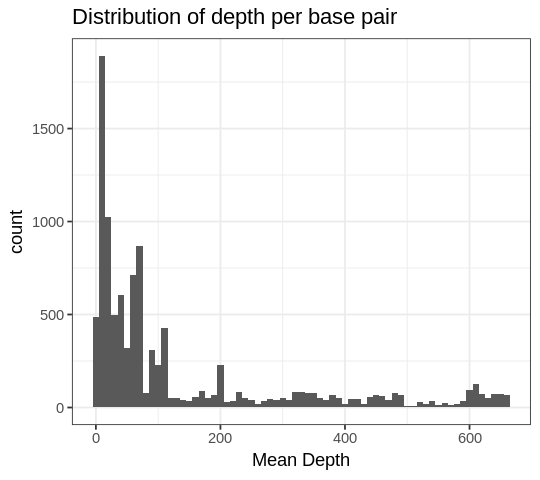

In [53]:
ggplot(dat, aes(x=Mean)) + geom_histogram(binwidth = 10) + theme_bw() + labs(x="Mean Depth", title="Distribution of depth per base pair")

In [56]:
dat = dat_join %>% 
    rowwise() %>% 
    mutate(Mean = mean(Input1:TFX5_Dex), 
           Var  = var( Input1:TFX5_Dex)) %>%
    mutate(log10mu  = log10(Mean), 
           log10var = log10(Var))

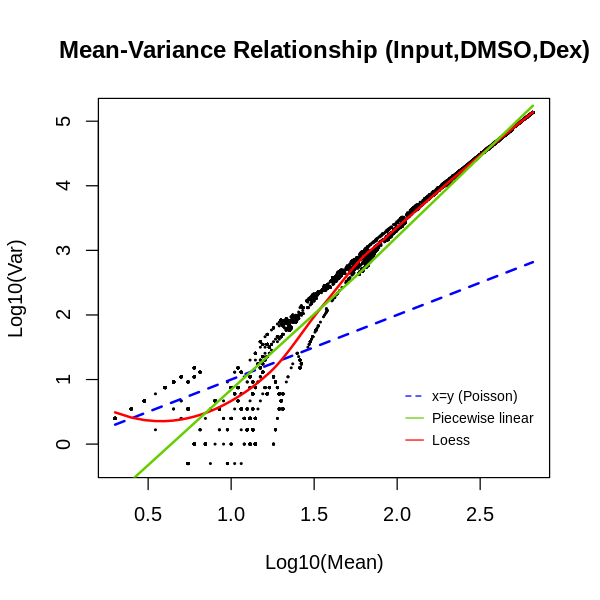

In [61]:
### arrange data and set knots for piecewise linear regression
df = dat %>% arrange(log10mu)
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
#pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
pieceMod = lm(log10var ~ log10mu + q2, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.85
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     cex=0.3,
     pch=20, 
     main="Mean-Variance Relationship (Input,DMSO,Dex)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")
     #xlim=c( 0.0,  0.5),
     #ylim=c(-0.5,  1.0))

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
legend(2.0, 1, 
       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
       col=c("blue", "chartreuse3", "red"), 
       lty=c(2, 1, 1), 
       cex=0.7,
       box.lty=0,
       y.intersp=2)

## plot coverage

In [12]:
dat = dat_join %>% head(1000)
head(dat)

Chrom,Loc,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8148987,10,18,13,8,8,97,35,30,20,39,34,11,35
chr17,8148988,10,18,13,8,8,97,35,30,20,39,34,18,35
chr17,8148989,10,18,13,8,8,97,35,30,20,39,34,20,35
chr17,8148990,10,18,13,8,9,97,35,30,20,39,34,20,35
chr17,8148991,10,18,13,8,9,97,35,30,20,39,34,20,35
chr17,8148992,10,20,14,8,9,97,35,30,20,39,34,20,35


In [13]:
dat = dat_join %>% dplyr::select(Chrom, Loc, Input1:Input5) %>% gather(Sample, Depth, -Chrom, -Loc)
head(dat)

Chrom,Loc,Sample,Depth
chr17,8148987,Input1,10
chr17,8148988,Input1,10
chr17,8148989,Input1,10
chr17,8148990,Input1,10
chr17,8148991,Input1,10
chr17,8148992,Input1,10


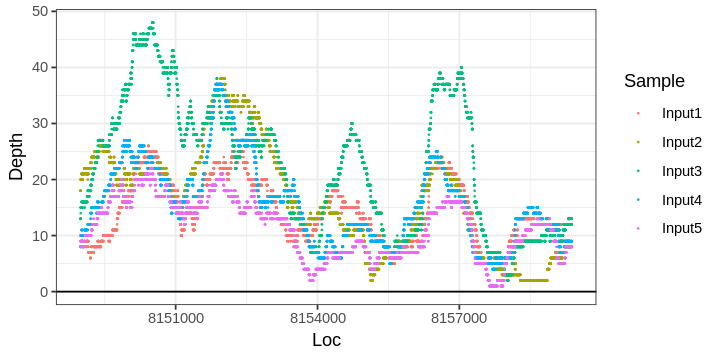

In [14]:
options(repr.plot.height=3, repr.plot.width=6)
dat$Sample = factor(dat$Sample, levels=colnames(dat_join))
ggplot(dat, aes(x=Loc, y=Depth, group=Sample, color=Sample)) +
  geom_point(size=0.1) +
  geom_hline(yintercept=0) + 
  theme_bw()

In [15]:
dat = dat_join %>% 
    dplyr::select(Chrom, Loc, TFX2_DMSO:TFX5_DMSO) %>% 
    gather(Sample, Depth, -Chrom, -Loc)
head(dat)

Chrom,Loc,Sample,Depth
chr17,8148987,TFX2_DMSO,97
chr17,8148988,TFX2_DMSO,97
chr17,8148989,TFX2_DMSO,97
chr17,8148990,TFX2_DMSO,97
chr17,8148991,TFX2_DMSO,97
chr17,8148992,TFX2_DMSO,97


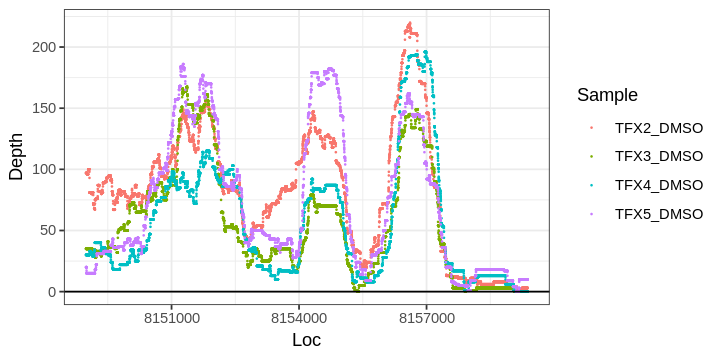

In [16]:
options(repr.plot.height=3, repr.plot.width=6)
dat$Sample = factor(dat$Sample, levels=colnames(dat_join))
ggplot(dat, aes(x=Loc, y=Depth, group=Sample, color=Sample)) +
  geom_point(size=0.1) +
  geom_hline(yintercept=0) + 
  theme_bw()

In [80]:
dat = dat_join %>% gather(Sample, Depth, -Chrom, -Loc)
head(dat)

Chrom,Loc,Sample,Depth
chr17,8148987,Input1,10
chr17,8148988,Input1,10
chr17,8148989,Input1,10
chr17,8148990,Input1,10
chr17,8148991,Input1,10
chr17,8148992,Input1,10


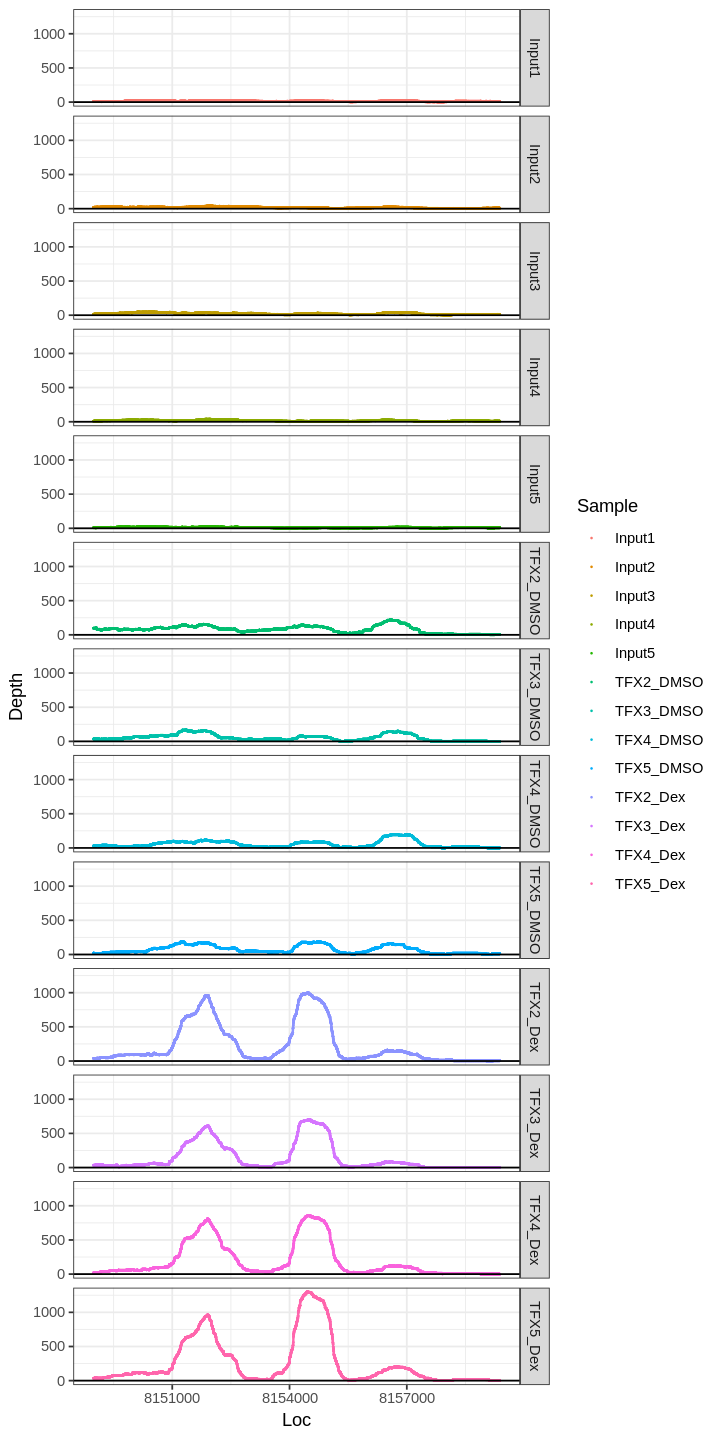

In [88]:
options(repr.plot.height=12, repr.plot.width=6)
dat$Sample = factor(dat$Sample, levels=colnames(dat_join))
ggplot(dat, aes(x=Loc, y=Depth, group=Sample, color=Sample)) +
  geom_point(size=0.1) +
  geom_hline(yintercept=0) + 
  theme_bw() +
  facet_grid(Sample~.)

## get correlation

In [104]:
8148987-8159379

[1] -10392

In [89]:
dim(dat_join)

[1] 10393    15

In [90]:
seq(from=1, to=nrow(dat_join), by = 100) %>% head

[1]   1 101 201 301 401 501

In [94]:
seq(from=1, to=nrow(dat_join), by = 10) %>% length

[1] 1040

In [95]:
head(dat_join)

Chrom,Loc,Input1,Input2,Input3,Input4,Input5,TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO,TFX2_Dex,TFX3_Dex,TFX4_Dex,TFX5_Dex
chr17,8148987,10,18,13,8,8,97,35,30,20,39,34,11,35
chr17,8148988,10,18,13,8,8,97,35,30,20,39,34,18,35
chr17,8148989,10,18,13,8,8,97,35,30,20,39,34,20,35
chr17,8148990,10,18,13,8,9,97,35,30,20,39,34,20,35
chr17,8148991,10,18,13,8,9,97,35,30,20,39,34,20,35
chr17,8148992,10,20,14,8,9,97,35,30,20,39,34,20,35


In [108]:
idx = seq(from=1, to=nrow(dat_join), by = 10)
dat = dat_join[idx,]
dat = dat %>% unite("idn", Chrom:Loc) %>% column_to_rownames(var = "idn") %>%
    dplyr::select(Input1:Input5) %>% t %>%
    as.data.frame 
dim(dat)

[1]    5 1040

In [109]:
dat[,1:5]

,chr17_8148987,chr17_8148997,chr17_8149007,chr17_8149017,chr17_8149027
Input1,10,10,10,9,9
Input2,18,20,21,21,20
Input3,13,15,15,15,16
Input4,8,8,9,11,10
Input5,8,9,9,9,8


In [110]:
dat_cor = correlate(dat)


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'



In [111]:
dim(dat_cor)

[1] 1040 1041

In [112]:
dat_cor[1:4, 1:4]

term,chr17_8148987,chr17_8148997,chr17_8149007
chr17_8148987,NA,0.9919319,0.9930177
chr17_8148997,0.9919319,NA,0.9949375
chr17_8149007,0.9930177,0.9949375,NA
chr17_8149017,0.9529216,0.9552546,0.9776924


In [113]:
tmp = dat_cor %>% stretch

In [114]:
head(tmp)

x,y,r
chr17_8148987,chr17_8148987,NA
chr17_8148987,chr17_8148997,0.9919319
chr17_8148987,chr17_8149007,0.9930177
chr17_8148987,chr17_8149017,0.9529216
chr17_8148987,chr17_8149027,0.9591944
chr17_8148987,chr17_8149037,0.9779836


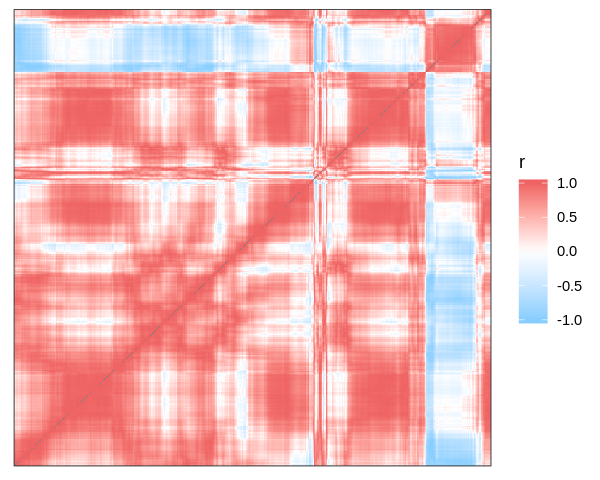

In [122]:
options(repr.plot.height=4, repr.plot.width=5)
ggplot(tmp, aes(x=x, y=y, fill=r)) + geom_tile() + theme_bw() +
    theme(
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank()) +
    scale_fill_gradient2(
        low  = "skyblue1",
        mid  = "white",
        high = "indianred2") +
    labs()

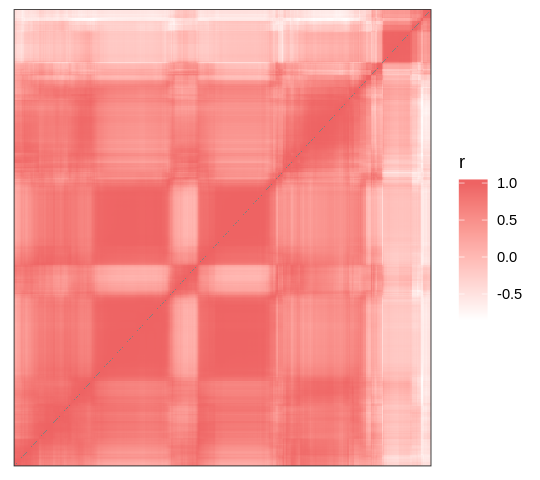

In [103]:
options(repr.plot.height=4, repr.plot.width=4.5)
ggplot(tmp, aes(x=x, y=y, fill=r)) + geom_tile() + theme_bw() +
    theme(
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank()) +
    scale_fill_gradient(
        low  = "white",
        high = "indianred2")

Don't know how to automatically pick scale for object of type noquote. Defaulting to continuous.


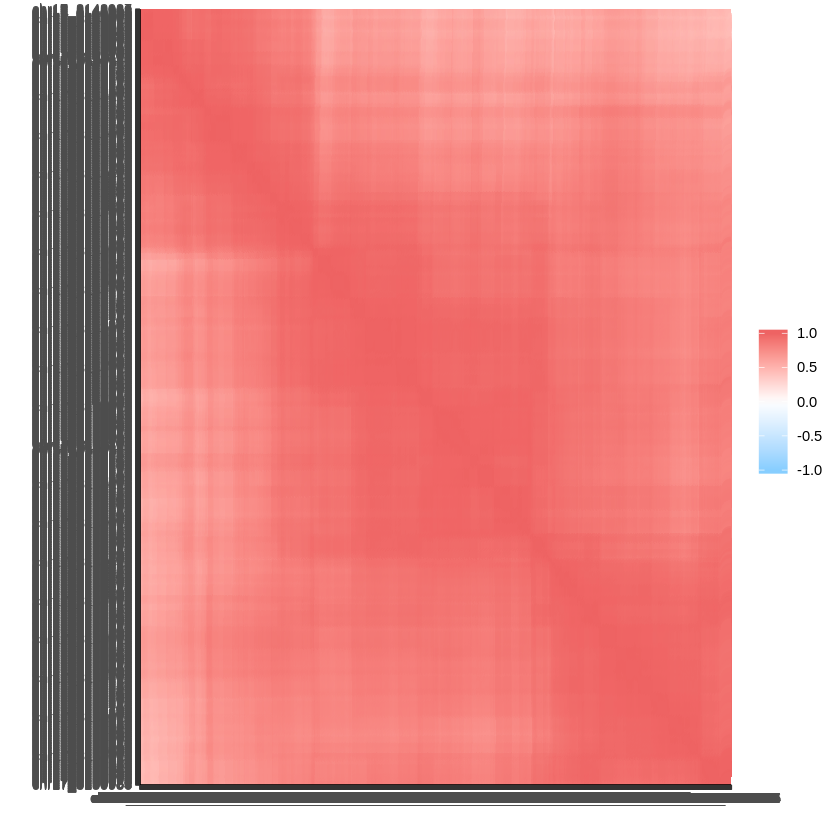

In [33]:
rplot(
    dat_cor,
    colours = c("skyblue1", "white", "indianred2")
)